In [20]:
import pandas as pd
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import beta

In [2]:
df = pd.read_csv('data/ab_data.csv')

In [3]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [6]:
group_A = len(df[df['group']=='control'])
group_B = len(df[df['group']=='treatment'])

In [7]:
conversions_A = len(df[(df['group']=='control') & (df['converted']==1)])
conversions_B = len(df[(df['group']=='treatment') & (df['converted']==1)])

In [8]:
conversions_A

17723

In [9]:
conversions_B

17514

In [10]:
#group A
with pm.Model() as model_A:
    #set the prior distribution of $p_A$.
    p_A=pm.Uniform('p_A', lower=0, upper=1)  
    
    #fit the observed data to our model 
    obs=pm.Binomial("obs", n=group_A, 
                    p=p_A, observed=conversions_A)
    #MCMC algorithm 
    step=pm.Metropolis()
    #sampling from the posterior distriubtion. 
    trace_A=pm.sample(30000, step=step)
    burned_trace_A=trace_A[1000:]

<ipython-input-10-9900ea3da713>:12: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_A=pm.sample(30000, step=step)
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [p_A]


Sampling 2 chains for 1_000 tune and 30_000 draw iterations (2_000 + 60_000 draws total) took 26 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [11]:
#group B
with pm.Model() as model_B:
    #set the prior distribution of $p_B$.
    p_B=pm.Uniform('p_B', lower=0, upper=1)  
    
    #fit the observed data to our model 
    obs=pm.Binomial("obs", n=group_B, 
                    p=p_B, observed=conversions_B)
    
    #MCMC algorithm 
    step=pm.Metropolis()
    #sampling from the posterior distriubtion. 
    trace_B=pm.sample(30000, step=step)
    burned_trace_B=trace_B[1000:]

<ipython-input-11-de9609be091b>:13: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_B=pm.sample(30000, step=step)
Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [p_B]


Sampling 2 chains for 1_000 tune and 30_000 draw iterations (2_000 + 60_000 draws total) took 21 seconds.
The number of effective samples is smaller than 25% for some parameters.


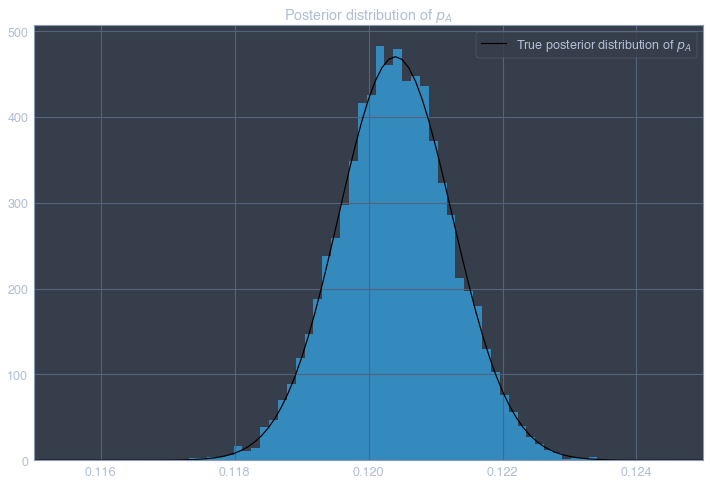

In [66]:
#histogram for samples from the posterior distribution of  $p_A$
fig, ax = plt.subplots(1,1, figsize=(12,8))
alpha_prior=beta_prior=1
a=alpha_prior+conversions_A
b=beta_prior+group_A-conversions_A
coef=beta(a,b)
plt.title(r"Posterior distribution of $p_A$")
plt.hist(burned_trace_A["p_A"], bins=50, histtype='stepfilled', density=True, color='#348ABD')
x=np.arange(0,1.04,0.0001)
y= beta.pdf(x, a, b) 
plt.plot(x, y, color='black', label='True posterior distribution of $p_A$')
plt.xlim(0.115, 0.125)
plt.legend()
plt.show()

In [35]:
#histogram for samples from the posterior distribution of  $p_A$
fig, ax = plt.subplots(1,1, figsize=(12,8))
alpha_prior=beta_prior=1
a=alpha_prior+conversions_B
b=beta_prior+group_B-conversions_B
coef=beta(a,b)
plt.title(r"Posterior distribution of $p_A$")
plt.hist(burned_trace_A["p_A"], bins=50, histtype='stepfilled', density=True, color='#348ABD')
x=np.arange(0,1.04,0.0001)
y= beta.pdf(x, a, b) 
plt.plot(x, y, color='black', label='True posterior distribution of $p_A$')
plt.xlim(0.115, 0.125)
plt.legend()
plt.show()

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  , 1.01, 1.02, 1.03])

In [67]:
#the sample mean-an estimate for conversion rate of group A. 
samples_posterior_A=burned_trace_A['p_A']
samples_posterior_A.mean()

0.12039600610128469

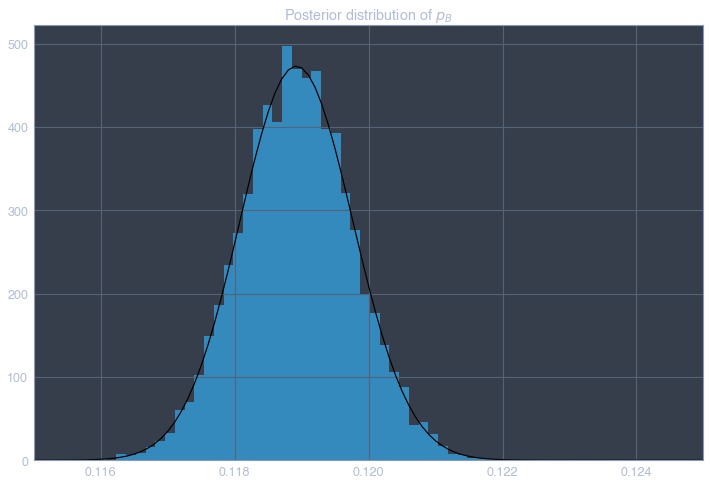

In [74]:
#histogram for samples from the posterior distribution of  $p_B$
fig, ax = plt.subplots(1,1, figsize=(12,8))
alpha_prior=beta_prior=1
a=alpha_prior+conversions_B
b=beta_prior+group_B-conversions_B
plt.title(r"Posterior distribution of $p_B$")
plt.hist(burned_trace_B["p_B"], bins=50, histtype='stepfilled', density=True, color='#348ABD')
x=np.arange(0,1.04,0.0001)
y= beta.pdf(x, a, b) 
plt.plot(x, y, color='black', label='True posterior distribution of $p_A$')
plt.xlim(0.115, 0.125)
plt.show()

In [70]:
samples_posterior_B=burned_trace_B['p_B']
samples_posterior_B.mean()

0.11892074720498601

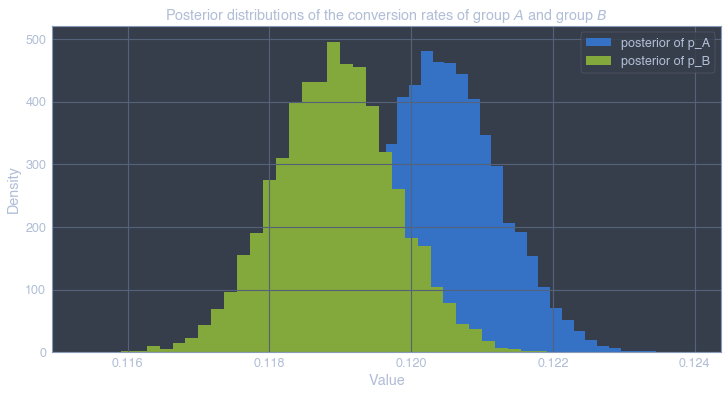

In [76]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
plt.hist(samples_posterior_A, bins=40, label='posterior of p_A', density=True)
plt.hist(samples_posterior_B, bins=40, label='posterior of p_B', density=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("Posterior distributions of the conversion rates of group $A$ and group $B$")
plt.legend()
plt.show()

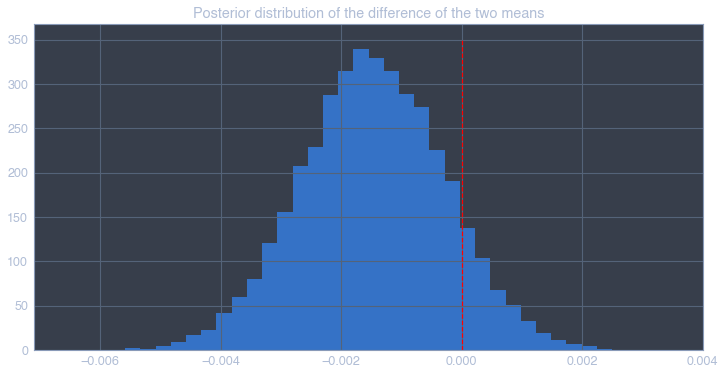

In [79]:
difference=samples_posterior_B-samples_posterior_A
fig, ax = plt.subplots(1,1, figsize=(12,6))
plt.hist(difference, bins=40, density=True)
plt.vlines(0, 0, 350, linestyle='--', color='red')
plt.title('Posterior distribution of the difference of the two means')
plt.show()

In [84]:
#probability of  decrease for group B
100*len(difference[difference<0])*1.0/len(difference)

89.40172413793104

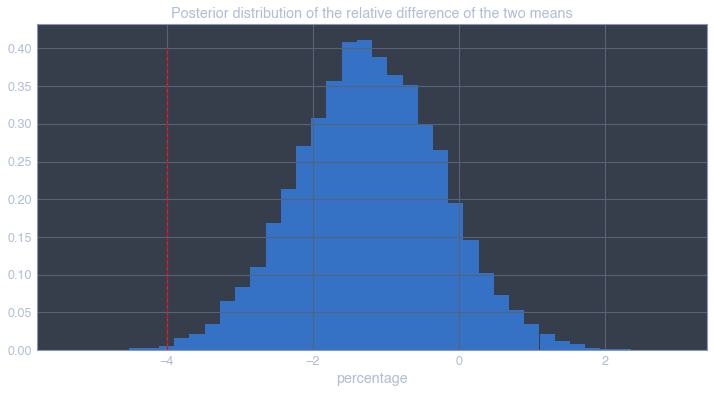

In [90]:
# relative difference
rel_difference=100*(samples_posterior_B-samples_posterior_A)/samples_posterior_A
fig, ax = plt.subplots(1,1, figsize=(12,6))
plt.hist(rel_difference, bins=40, density=True)
plt.vlines(-4, 0, 0.4, linestyle='--', color='red')
plt.title('Posterior distribution of the relative difference of the two means')
plt.xlabel("percentage")
plt.show()

In [89]:
100*len(rel_difference[rel_difference>-4])*1.0/len(rel_difference)
97.6301724137931

97.6301724137931